In [105]:
import scipy.io as sio
import numpy as np
import mne
import matplotlib.pyplot as plt
import networkx as nx
import bct

In [7]:
eegDataMain = sio.loadmat('Data/first_ten_eeg.mat')
eegData = eegDataMain['first_ten_eeg']
eegParams = eegDataMain['params']

In [40]:
metaData = sio.loadmat('Data/metadata.mat')['metadata']

In [67]:
a = [f for f in ((metaData[0,0])[0][0])]

In [169]:
def avg_clustering(data):
    [conn,freqs,times,m_ep,n_tapers] = mne.connectivity.spectral_connectivity([data],method='coh', verbose=False)
    graph = np.nanmean(conn,2)
    complete_graph = graph+graph.T
#     clustering_coeffs = bct.clustering_coef_wu(complete_graph)
    clustering_coeffs = bct.efficiency_wei(complete_graph)
    avg_clustering = np.nanmean(clustering_coeffs)
    return avg_clustering

def global_efficiency(data):
    [conn,freqs,times,m_ep,n_tapers] = mne.connectivity.spectral_connectivity([data],method='coh', verbose=False)
    graph = np.nanmean(conn,2)
    complete_graph = graph+graph.T
#     clustering_coeffs = bct.clustering_coef_wu(complete_graph)
    global_coeff = bct.efficiency_wei(complete_graph, local=False)
    return global_coeff

In [173]:
sub = 8

nTrials = np.shape(eegData)[2]
# nTrials = 1
pre_stim_vals = np.zeros(nTrials)
post_stim_vals = np.zeros(nTrials)


for trial in range(nTrials):
    pre_stim = eegData[sub,:,trial,:200]
    post_stim = eegData[sub,:,trial,200:]
    
    pre_stim_vals[trial] = global_efficiency(pre_stim)
    
    post_stim_vals[trial] = global_efficiency(post_stim)



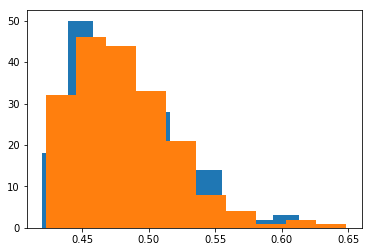

In [174]:
plt.figure()
plt.hist(pre_stim_vals)
plt.hist(post_stim_vals)
plt.show()

In [163]:
pre_stim_vals

array([0.46513684])

In [167]:
?bct.efficiency_wei

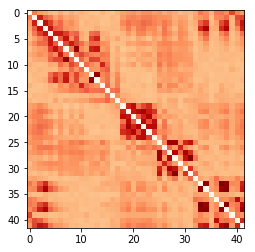

In [134]:
plt.figure()
plt.imshow(complete_graph,cmap='OrRd')
plt.show()

In [130]:
G = networkx.from_numpy_matrix(graph)

AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

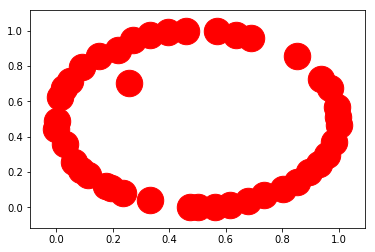

In [94]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [87]:
nx.clustering(G, edges=G.edges)

TypeError: clustering() got an unexpected keyword argument 'edges'

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [133]:
avg_clustering

0.444656711669144

In [126]:
complete_graph

array([[ 0.        ,  0.03017852,  0.05820229, ..., -0.17126392,
         0.14659706,  0.09230171],
       [ 0.03017852,  0.        ,  0.01426388, ..., -0.13153707,
         0.07259609,  0.08129815],
       [ 0.05820229,  0.01426388,  0.        , ..., -0.05936239,
        -0.01248571,  0.02858883],
       ...,
       [-0.17126392, -0.13153707, -0.05936239, ...,  0.        ,
         0.25064714,  0.04675892],
       [ 0.14659706,  0.07259609, -0.01248571, ...,  0.25064714,
         0.        ,  0.05188048],
       [ 0.09230171,  0.08129815,  0.02858883, ...,  0.04675892,
         0.05188048,  0.        ]])